# Линейная классификация

Мы освоили линейные модели для задач регрессии, то есть для прогнозирования вещественного числа.

Давайте посмотрим, как использовать линейные модели для решения задач классификации.
На примере бинарной классификации, то есть предсказания меток -1 и 1.

Линейную функцию мы будем использовать, чтобы разделить объекты на два класса:

предположим, что они расположены таким образом, что есть некая линия, такая что с одной стороны находятся скорее всего все объекты одного класса, а с другой почти все объекты другого класса, за исключением некой статистической погрешности или выбросов

и у этой линии будет линейное уравнение
$$0 = w_0 + w_1 x_1 + w_2 x_2 $$

Если же объекты описаны большим количеством признаков,  то это будет не прямая, а некая гиперплоскость, которая будет разделять наши два класса, и ее уровнение
$$0 = w_0 + w_1 x_1 + ... + w_N x_N = \langle w,X\rangle $$


Поскольку уравнение $ \langle w,X\rangle = 0$ описывает гиперплоскольсть в пространстве признаков, то для точек по одну сторону от этой плоскости такое скалярное произведение будет больше нуля, а для точек по другую сторону - меньше нуля

и чем больше $\langle w,X\rangle$ по модулю, тем дальше отбъект находится от разделяющей гиперплоскости

А значит мы можем взять функцию знака от скалярного произведения:

$$a(x) =  sign \langle w,X\rangle =  sign \left( w_0 + \sum^N_{i=1}w_i x_i \right)$$


Таким образом линейный классификатор относит объекты по разные стороны от плоскости к разным классам, и чем дальше точка от плоскости, тем увереннее классификатор дает прогноз.

Получив прогноз для конкретной точки $sign \langle w, x_i\rangle$
и умножив его на правильный ответ (+1  или -1) для нее
$$ y_i sign \langle w, x_i\rangle$$
мы получим  1  для верного прогноза (то есть знак предсказания совпадает со знаком верного ответа) и   -1  если классификатор ошибся.

Величина $$M_i = y_i\langle w,x_i\rangle$$ называется **отступ**

Чем дальше отступ от нуля, тем увереннее классификатор дает прогноз.
Если отступ  положителен, то классификатор дает верный ответ, если отрицателен, то ошибается

Если отступ для некоторого объекта и отрицательный и большой по модулю, это значит, что алгоритм неправильно описывает данные: либо этот объект является выбросом, либо алгоритм не пригоден для решения данной задачи.

### Итак...

- Линейный классификатор разделяет два класса гиперплоскостью
- Чем больше отступ по модулю, тем дальше объект от гиперплоскости
- Знак отступа говорит о корректности предсказания


## Обучение линейного классификатора
заключается в подборе такого положения гиперплоскости, при котором классы разделяются наилучшим образом.

### Ошибка линейной классификации

В случае линейной классификации естественный способ определить качество алгоритма — вычислить для объектов обучающей выборки долю неправильных ответов:

$$Q(w,x) = \frac{1}{l}\sum^l_{i=1}\left[a(x_i) \neq y_i\right] $$

здесь квадратные скобки означают 1 если выражение внутри этих скобок истино и 0 если оно ложно

$$
\left[  P\right] = \left\{
    \begin{array}\\
        1 & \mbox{,  P is true} \\
        0 & \mbox{, P is false } \\
    \end{array}
\right.
$$

или то же самое через отступ:  

$$Q(w,x) = \frac{1}{l}\sum^l_{i=1}\left[M_i<0\right] = \frac{1}{l}\sum^l_{i=1}\left[y_i\langle w,x_i\rangle<0\right]$$

Функция, стоящая под знаком суммы, называется функцией потерь. В данном случае это пороговая функция потерь.

Такая функция является разрывной в точке 0, что делает невозможным применение метода градиентного спуска.

Возьмем любую гладкую оценку пороговой функции и будем минимизировать не долю неправильных ответов, а некоторую функцию, которая является оценкой сверху

### Примеры таких гладких функций:

- Логистическая функция потерь (используется в логистической регрессии, о которой речь и пойдет сегодня):

$L ̃(M) = \log_2 (1+exp(−M))$
- Экспоненциальная функция потерь:

$  L ̃(M) = exp(−M)$

- Кусочно-линейная функция потерь (используется в методе опорных векторов):

$L ̃ (M ) = max(0, 1 − M )$


В случае логистической функции потерь функционал ошибки имеет вид:

$$Q(w,x) = \frac{1}{l}\sum^l_{i=1}\log_{2} \left(1+exp \left(-M_i\right)\right) = \frac{1}{l}\sum^l_{i=1}\log_{2} \left(1+exp \left(-y_i\langle w,x_i\rangle\right)\right)$$
Получившееся выражение является гладким, а, следовательно при обучении, можно использовать, метод градиентного спуска.

С переобучением же будем бороться регуляризацией.

# Логистическая регрессия - ПРАКТИКА

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import OneHotEncoder

from sklearn.neighbors import KNeighborsClassifier

import datetime

## Практика 1 - пресказываем выживших на Титанике

### Шаг 1 -  Готовим данные
- Загрузите датасет  **titanic.csv**
- Посмотрите на типы данных у признаков
- Переведите гендерный признак в целочисленный формат
- Сформируйте вектор меток и матрицу числовых признаков

In [ ]:
# your code here
df = pd.read_csv('titanic.csv')
df = df.fillna(0)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1309 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1309 non-null   float64
 9   cabin      1309 non-null   object 
 10  embarked   1309 non-null   object 
 11  boat       1309 non-null   object 
 12  body       1309 non-null   float64
 13  home.dest  1309 non-null   object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [ ]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,0.0,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,0.0,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,0,0.0,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,0,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,0,0.0,"Montreal, PQ / Chesterville, ON"


In [ ]:
df['sex'] = (df['sex'] == 'male').astype(int)
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",0,29.00,0,0,24160,211.3375,B5,S,2,0.0,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",1,0.92,1,2,113781,151.5500,C22 C26,S,11,0.0,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",0,2.00,1,2,113781,151.5500,C22 C26,S,0,0.0,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",1,30.00,1,2,113781,151.5500,C22 C26,S,0,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",0,25.00,1,2,113781,151.5500,C22 C26,S,0,0.0,"Montreal, PQ / Chesterville, ON"


In [ ]:
y = df['survived']
X = df.loc[:, ['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare']]
X

,pclass,sex,age,sibsp,parch,fare
0,1,0,29.00,0,0,211.3375
1,1,1,0.92,1,2,151.5500
2,1,0,2.00,1,2,151.5500
3,1,1,30.00,1,2,151.5500
4,1,0,25.00,1,2,151.5500
...,...,...,...,...,...,...
1304,3,0,14.50,1,0,14.4542
1305,3,0,0.00,1,0,14.4542
1306,3,1,26.50,0,0,7.2250
1307,3,1,27.00,0,0,7.2250


### Шаг 2 -  обучаем логистическую регрессию
- обучите логистическую регрессию с параметрами по умолчанию
    - l2-регуляризация
    - коэффициент регуляризации 1
    - оптимизация методом градиентного спуска
- получите вектор предсказаний (выжил/не выжил)
- получите оценку правильности (долю правильных ответов) для всей выборки
- выведите весовые коэффициенты для признаков

In [ ]:
# your code here
lr = LogisticRegression()
lr.fit(X,y)

LogisticRegression()

In [ ]:
y_pred = lr.predict(X)
accuracy_score(y, y_pred)

0.7845683728036669

In [ ]:
lr.coef_

array([[-8.85087332e-01, -2.52040471e+00, -1.50691286e-02,
        -2.73801798e-01,  2.61527098e-05,  2.56502447e-03]])

In [ ]:
np.array([X.columns, lr.coef_[0]]).T

array([['pclass', -0.885087332281995],
       ['sex', -2.520404706003285],
       ['age', -0.015069128552294976],
       ['sibsp', -0.2738017977774419],
       ['parch', 2.6152709809307908e-05],
       ['fare', 0.0025650244722678454]], dtype=object)

### Шаг 3 -  сравниваем с классификацией на ближайших соседях
- обучите классификатор kNN для k=7
- получите долю правильных ответов
- сравните с рещультатом предыдущего шага

In [ ]:
# your code here
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X,y)
y_pred = knn.predict(X)
accuracy_score(y, y_pred)

0.8189457601222307

## Практика 2 - оптимизируем логистическую регрессию
### Шаг 1 -  меняем параметры логистической регрессии
- повторите шаг 2 практики 1 с явно установленными параметрами:
    - оптимизация методом градиентного спуска
    - Лассо-регуляризация
    - параметр регуляризации С=0.05
- все ли признаки из матрицы Х были включены в модель?

In [ ]:
# your code here
lr = LogisticRegression(solver = 'liblinear', penalty = 'l1', C = 0.5)
lr.fit(X,y)
y_pred = lr.predict(X)
accuracy_score(y, y_pred)

0.787624140565317

### Шаг 2 -  подбираем параметры логистической регрессии
- используйте решетчатый поиск для оптимизации параметров регуляризации
- какая наилучшая средняя оценка получилась?
- на какой комбинации параметров?

In [ ]:
# your code here

In [ ]:
lr = LogisticRegression(solver = 'liblinear')
params = {'penalty' : ['l2'],
          'C': np.arange(0.0001, 1, 0.002)}

gs = GridSearchCV(lr, params)
gs.fit(X,y)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
2500 fits failed out of a total of 2500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2500 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py", line 1508, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.8/dist-packages/sklearn/base.py", line 581, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/usr/local/lib/python3.8/dist-packa

ValueError: ignored

In [ ]:
gs.best_params_, gs.best_score_

In [ ]:
lr = LogisticRegression(solver = 'liblinear')
params = {'penalty' : ['l1'],
          'C': np.arange(0.001, 1, 0.001)}

gs = GridSearchCV(lr, params)
gs.fit(X,y)

In [ ]:
gs.best_params_, gs.best_score_

## Практика 3 - используем расстояние до разделяющей гиперплоскости
- посчитайте для каждого объекта скалярное произведение объекта на вектор весовых коэффициентов (не забудьте коэффициент  w_0 (храниться в атрибуте модели intercept_))
- визуализируйте зависимость предсказанного класса от скалярного произведения
- постройте вектор вероятностных оценок отнесения объекта к конкретному классу с использованием функции сигмоиды
$$\sigma(\langle w, x\rangle) = \frac{1}{1+\exp(-\langle w, x\rangle)}$$

In [ ]:
# your code here

In [ ]:
lr = LogisticRegression(solver = 'liblinear', penalty = 'l1', C = 0.083)
lr.fit(X,y)
y_pred = lr.predict(X)
accuracy_score(y, y_pred)

0.7815126050420168

In [ ]:
y_pred[:10]

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 0])

In [ ]:
#w0
lr.intercept_

array([1.41203346])

In [ ]:
#w1,w2,...
lr.coef_[0]

array([-0.34354965, -2.06099514, -0.00299113, -0.1881485 ,  0.        ,
        0.007543  ])

In [ ]:
X.dot(lr.coef_[0]) + lr.intercept_

0       2.575860
1      -0.040270
2       2.017495
3      -0.127252
4       1.948699
          ...   
1304    0.258893
1305    0.302264
1306   -1.704377
1307   -1.705873
1308   -1.706952
Length: 1309, dtype: float64

In [ ]:
z = np.array(X.dot(lr.coef_[0]) + lr.intercept_)
z

array([ 2.57585954, -0.04027019,  2.01749453, ..., -1.70437742,
       -1.70587299, -1.7069523 ])

In [ ]:
y_pred

array([1, 0, 1, ..., 0, 0, 0])

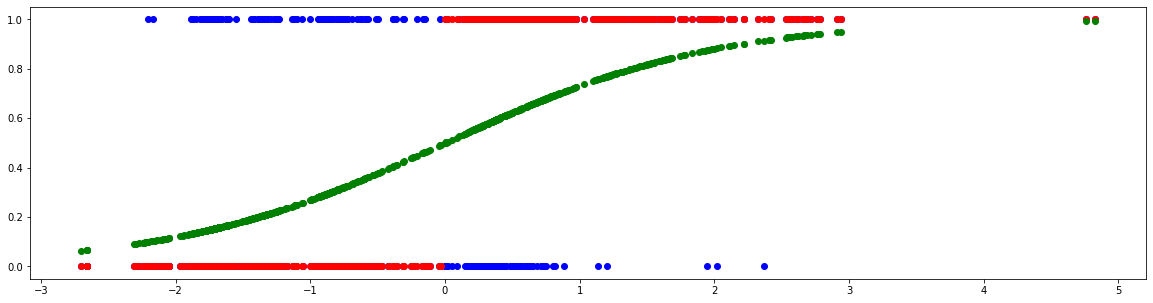

In [ ]:
fig = plt.figure(figsize=(20,5))
plt.scatter(z, y, c = 'b')
plt.scatter(z, y_pred, c = 'r')
plt.scatter(z,1/ (1 + np.exp(-z)), c = 'g')
plt.show()

In [ ]:
y.value_counts()

0    809
1    500
Name: survived, dtype: int64

## Практика 4 - используем категориальные признаки
- посмотрите внимательно на признак **pclass** (класс, которым путешествовал пассажир) - каков смысл числового значения у этого признака...
- избавьтесь от "числовой величины" признака, переведя его  в бинарный формат
- повторите шаг 2 практики 1 с обновленной матрицей признаков
- как изменилось качество прогноза?
- какие весовые коэффициенты у категориальных признаков?

In [ ]:
# your code here

In [ ]:
df['pclass'] = df['pclass'].astype(str)
y = df['survived']
X = df.loc[:, ['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']]
X

,pclass,sex,age,sibsp,parch,fare,embarked
0,1,0,29.00,0,0,211.3375,S
1,1,1,0.92,1,2,151.5500,S
2,1,0,2.00,1,2,151.5500,S
3,1,1,30.00,1,2,151.5500,S
4,1,0,25.00,1,2,151.5500,S
...,...,...,...,...,...,...,...
1304,3,0,14.50,1,0,14.4542,C
1305,3,0,0.00,1,0,14.4542,C
1306,3,1,26.50,0,0,7.2250,C
1307,3,1,27.00,0,0,7.2250,C


In [ ]:
#OneHotEncoder - Sklearn + безопасный(есть защита)
#getdummies - Pandas + более протсой синтаксис

S    914
C    270
Q    123
0      2
Name: embarked, dtype: int64

In [ ]:
X_new = pd.get_dummies(X)
X_new

,sex,age,sibsp,parch,fare,pclass_1,pclass_2,pclass_3,embarked_0,embarked_C,embarked_Q,embarked_S
0,0,29.00,0,0,211.3375,1,0,0,0,0,0,1
1,1,0.92,1,2,151.5500,1,0,0,0,0,0,1
2,0,2.00,1,2,151.5500,1,0,0,0,0,0,1
3,1,30.00,1,2,151.5500,1,0,0,0,0,0,1
4,0,25.00,1,2,151.5500,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,0,14.50,1,0,14.4542,0,0,1,0,1,0,0
1305,0,0.00,1,0,14.4542,0,0,1,0,1,0,0
1306,1,26.50,0,0,7.2250,0,0,1,0,1,0,0
1307,1,27.00,0,0,7.2250,0,0,1,0,1,0,0


In [ ]:
lr = LogisticRegression(solver = 'liblinear')
params = {'penalty' : ['l1'],
          'C': np.arange(0.0001, 1, 0.001)}

gs = GridSearchCV(lr, params)
gs.fit(X_new,y)

gs.best_params_, gs.best_score_

({'C': 0.0161, 'penalty': 'l1'}, 0.7448246614606182)

# Метрики для задач классификации

Вспомним, как измерять качество в задачах классификации.

Первой нашей мерой качества в задачах классификации была **доля правильных ответов**:

$$accuracy(a, X) = \frac{1}{l}\sum_{i=1}^l[a(x_i)=y_i]$$

У этой метрики две проблемы:
- несбалансированные выборки
- цены разных типов ошибок

**Матрица ошибок**

| ...   |y = 1 |y = -1|
|-------|--------|--------|
|a(x) =  1|True Positive (TP)| False Positive (FP)  |
|a(x) = -1|False Negative (FN)|  True Negative (TN) |

**Точность и полнота**

точность (precision), показывает, насколько можно доверять клас- сификатору в случае срабатывания
$$precision(a,X) = \frac{TP}{TP +FP}$$

полнота (recall), показывает, на какой доле истинных объектов первого класса алгоритм срабатывает
$$recall(a,X) = \frac{TP}{TP +FN}$$

**Объединение точности и полноты - F-мера**

$$F =\frac{2·precision·recall}{precision + recall}$$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import datasets
from sklearn import metrics

## Практика 5
### Шаг 1
В качестве данных возьмем пример данных с двумя признаками, поделенных на два класса.
- визуализируйте данные
- разделите данные на обучение и тест

In [ ]:
# получим набор данных
blobs = datasets.make_blobs(centers = 2, cluster_std = 5.5, random_state=42)
X = blobs[0]
y = blobs[1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
# your code here

In [ ]:
X[:5], y[:5]

(array([[-5.14465593,  7.99316176],
        [10.59666067,  7.76908097],
        [-5.50330261,  9.62436037],
        [ 9.16120972, 12.40553109],
        [ 5.89090848,  9.16245483]]), array([0, 1, 0, 1, 1]))

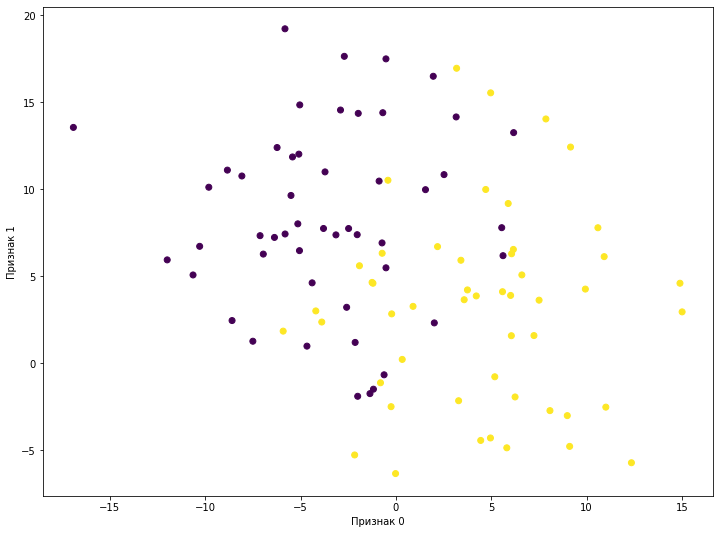

In [ ]:
fig = plt.figure(figsize=(12, 9))
plt.scatter(X[:, 0], X[:, 1], c = y)
plt.xlabel('Признак 0')
plt.ylabel('Признак 1')
plt.show()

### Шаг 2
- обучите логистическую регрессию с параметрами по-умолчанию. Не забудьте указать random_state для воспроизведения результатов
- постройте вектор предсказаний и сравните его с вектором меток
- формально оцените качество модели. Вам поможет функция metrics.accuracy_score
- выведите весовые коэффициенты обученной модели
- выведите вероятности принадлежности каждого объекта к нулевому и первому классам
- с помощью кросс-валидации на 10 фолдах получите устойчивую оценку accuracy

In [ ]:
# your code here

In [ ]:
lr = LogisticRegression().fit(X_train, y_train)
y_pred = lr.predict(X_test)
accuracy_score(y_test, y_pred)

NameError: ignored

In [ ]:
y_pred

array([0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0])

In [ ]:
y_prob = lr.predict_log_proba(X_test)
np.round(y_prob,3)

array([[-1.170e-01, -2.202e+00],
       [-3.072e+00, -4.700e-02],
       [-3.200e-02, -3.447e+00],
       [-2.514e+00, -8.400e-02],
       [-2.965e+00, -5.300e-02],
       [-1.271e+00, -3.290e-01],
       [-5.392e+00, -5.000e-03],
       [-4.101e+00, -1.700e-02],
       [-7.540e-01, -6.350e-01],
       [-9.700e-02, -2.378e+00],
       [-3.981e+00, -1.900e-02],
       [-1.700e-01, -1.855e+00],
       [-4.617e+00, -1.000e-02],
       [-2.239e+00, -1.130e-01],
       [-7.229e+00, -1.000e-03],
       [-2.149e+00, -1.240e-01],
       [-3.482e+00, -3.100e-02],
       [-8.000e-02, -2.571e+00],
       [-5.100e-02, -2.999e+00],
       [-1.800e-02, -4.039e+00],
       [-4.974e+00, -7.000e-03],
       [-3.801e+00, -2.300e-02],
       [-2.355e+00, -1.000e-01],
       [-6.060e-01, -7.890e-01],
       [-3.035e+00, -4.900e-02],
       [-1.538e+00, -2.420e-01],
       [-7.530e-01, -6.370e-01],
       [-8.920e-01, -5.270e-01],
       [-5.000e-02, -3.023e+00],
       [-6.496e+00, -2.000e-03],
       [-1

### Шаг 3
- постройте матрицу ошибок
- посчитайте точность отнесения объектов к нулевому классу
- посчитайте точность отнесения объектов к первому классу
- проинтерпретируйте полученные точности
- посчитайте полноту отнесения объектов к нулевому классу
- посчитайте полноту отнесения объектов к первому классу
- посчитайте f-меру

In [ ]:
# your code here

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [ ]:
confusion_matrix(y_test, y_pred)

array([[10,  6],
       [ 1, 16]])